### Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.



After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

### Buisness Goal

We have to make a better model to predict the used car price with a good accuracy. Our buisness goal is to put forward a model with good prediction accuracy and consistency.

#### Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [2]:
pd.set_option('display.max_rows',None)   #displaying the maximum rows
pd.set_option('display.max_columns',None)   #displaying the maximum columns
df=pd.read_csv('used_car.csv')

In [3]:
df.head()  #first five rows of the dataset

,Unnamed: 0,Name,Model,Year_of_Manufacturing,Owner_Type,Total_Distance_Travelled,Type,Fuel_Type,Price
0,0,Hyundai Verna,1.6 SX VTVT (O),2019,1st Owner,80631,Manual,Petrol,981699
1,1,KIA SELTOS,HTK PLUS 1.5 PETROL,2020,2nd Owner,12981,Manual,Petrol,1155299
2,2,Renault Kwid,RXT,2016,1st Owner,22388,Manual,Petrol,279799
3,3,Mercedes Benz C Class,C 200 AVANTGARDE,2014,1st Owner,36806,Automatic,Petrol,2133299
4,4,KIA SELTOS,HTX AT PETROL,2020,2nd Owner,21784,Automatic,Petrol,1429999


In [4]:
df.tail()  #last five rows of the dataset

,Unnamed: 0,Name,Model,Year_of_Manufacturing,Owner_Type,Total_Distance_Travelled,Type,Fuel_Type,Price
4978,4978,Maruti Alto,LXI,2019,1st Owner,18274,Manual,Petrol,335699
4979,4979,Maruti Alto,LXI,2019,1st Owner,16523,Manual,Petrol,344999
4980,4980,Maruti Alto 800,LXI,2019,1st Owner,21722,Manual,Petrol,339599
4981,4981,Maruti Alto,LXI,2019,1st Owner,17735,Manual,Petrol,344999
4982,4982,Maruti Dzire,VXI,2019,1st Owner,12651,Manual,Petrol,694799


In [5]:
df.shape  #total rows & columns in the dataset

(4983, 9)

Dataset contains 4983 rows and 9 columns

In [6]:
df.columns  #columns present in the dataset

Index(['Unnamed: 0', 'Name', 'Model', 'Year_of_Manufacturing', 'Owner_Type',
       'Total_Distance_Travelled', 'Type', 'Fuel_Type', 'Price'],
      dtype='object')

####  A brief info about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                4983 non-null   int64 
 1   Name                      4983 non-null   object
 2   Model                     4983 non-null   object
 3   Year_of_Manufacturing     4983 non-null   int64 
 4   Owner_Type                4983 non-null   object
 5   Total_Distance_Travelled  4983 non-null   int64 
 6   Type                      4941 non-null   object
 7   Fuel_Type                 4983 non-null   object
 8   Price                     4983 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 350.5+ KB


In [8]:
df.nunique()  #total unique values in each column in the dataset

Unnamed: 0                  4983
Name                         120
Model                        610
Year_of_Manufacturing         15
Owner_Type                     4
Total_Distance_Travelled    3481
Type                           2
Fuel_Type                      4
Price                       2743
dtype: int64

In [9]:
df.dtypes #datatype of wach column

Unnamed: 0                   int64
Name                        object
Model                       object
Year_of_Manufacturing        int64
Owner_Type                  object
Total_Distance_Travelled     int64
Type                        object
Fuel_Type                   object
Price                        int64
dtype: object

####  Checking the null values

In [10]:
df.isnull().sum()   

Unnamed: 0                   0
Name                         0
Model                        0
Year_of_Manufacturing        0
Owner_Type                   0
Total_Distance_Travelled     0
Type                        42
Fuel_Type                    0
Price                        0
dtype: int64

Type column has 42 null values which has to be handled

<AxesSubplot:>

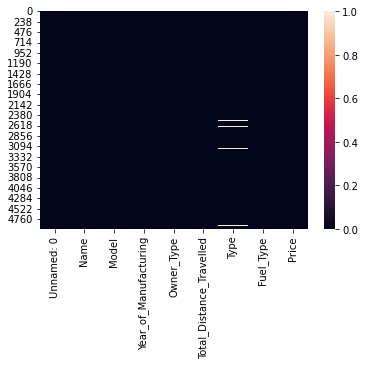

In [11]:
sns.heatmap(df.isnull())  #plotting the null values using the heatmap

In [12]:
df.drop('Unnamed: 0',inplace=True,axis=1)  #drop the unnecessary column

In [13]:
df['Type'].mode()  #checking the value which occur most of the time

0    Manual
dtype: object

#### Filling the null values

In [14]:
df['Type']=df['Type'].fillna('Manual')

In [15]:
df.isnull().sum()

Name                        0
Model                       0
Year_of_Manufacturing       0
Owner_Type                  0
Total_Distance_Travelled    0
Type                        0
Fuel_Type                   0
Price                       0
dtype: int64

Hence, there is no null value now

### Data Visualization

<AxesSubplot:xlabel='Type', ylabel='count'>

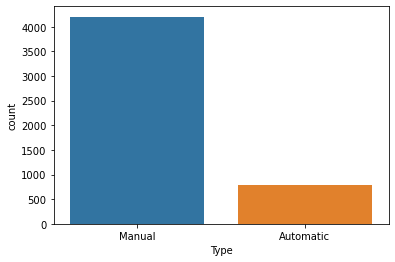

In [29]:
sns.countplot(df['Type'])

Most of the used cars are manual type.

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

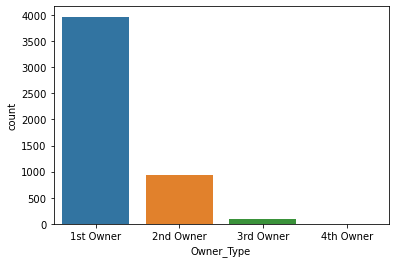

In [30]:
sns.countplot(df['Owner_Type'])

Most of the cars have their 1st owner who are seling the car.

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

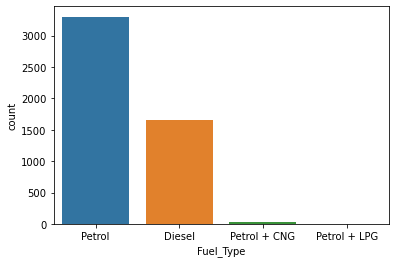

In [31]:
sns.countplot(df['Fuel_Type'])

Petrol based cars are on number one in the list followed by the diesel

<AxesSubplot:xlabel='Year_of_Manufacturing', ylabel='count'>

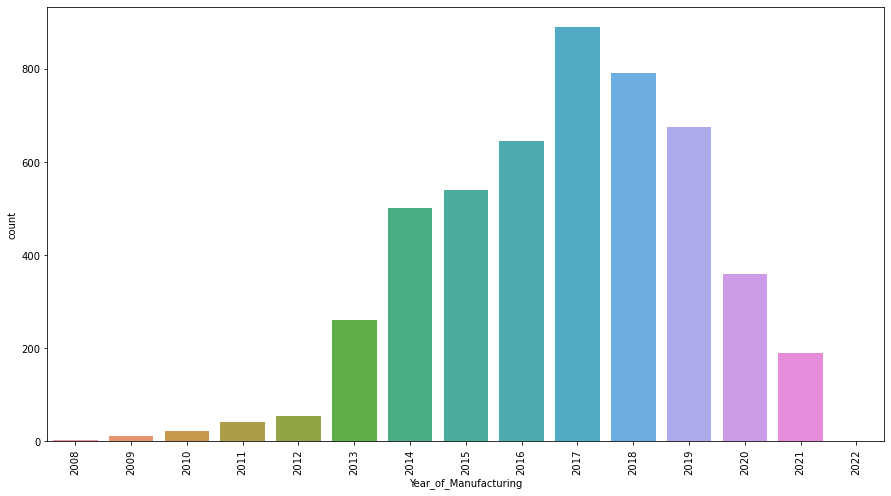

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(df['Year_of_Manufacturing'])

2017 year cars have the highest number in the dataset followed by the 2018 & 2019

<AxesSubplot:xlabel='Total_Distance_Travelled', ylabel='Density'>

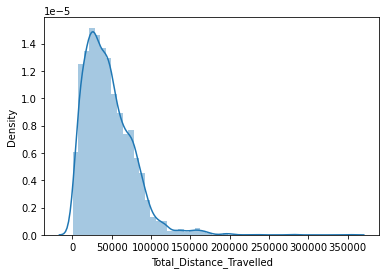

In [36]:
sns.distplot(df['Total_Distance_Travelled'])

Least travelled cars have high density.

<AxesSubplot:xlabel='Name', ylabel='count'>

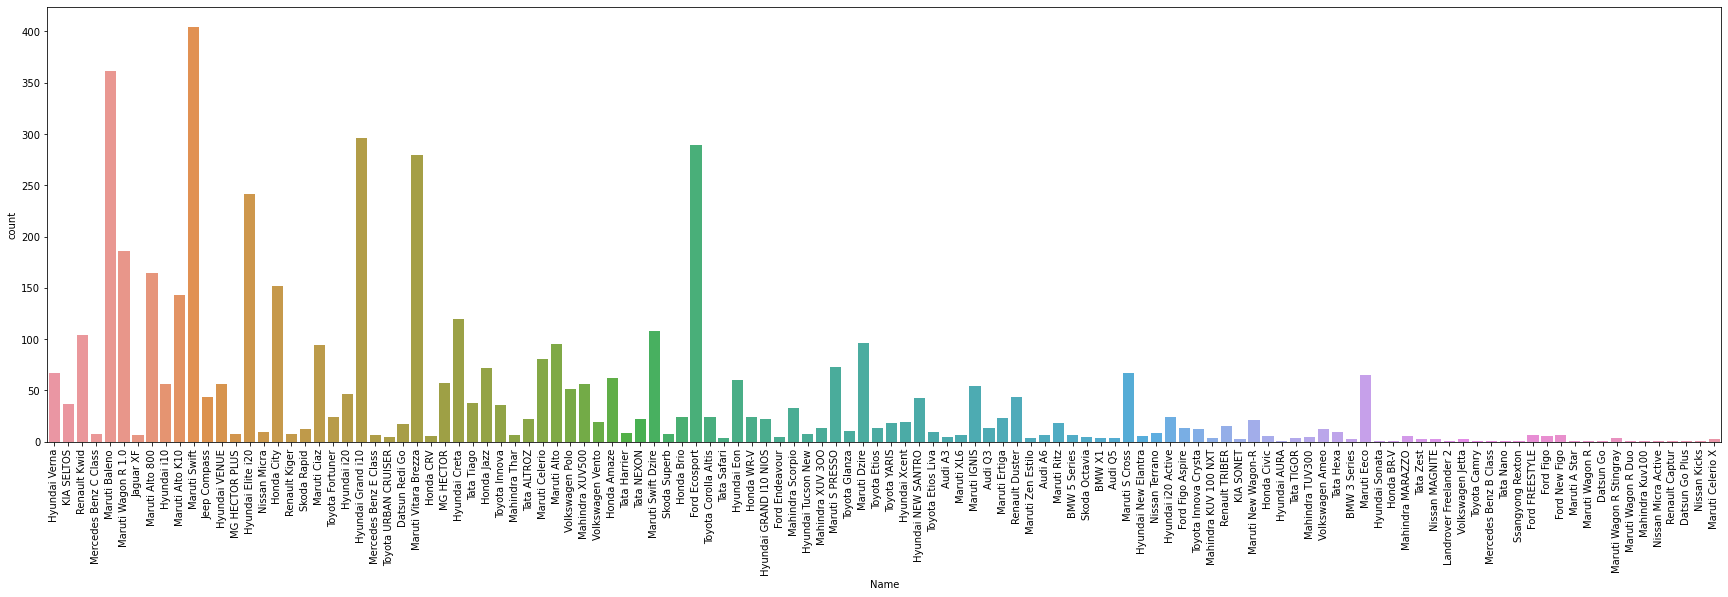

In [38]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.countplot(df['Name'])

Maruti swift cars number is the most followed by Maruti baleno

<AxesSubplot:xlabel='Name', ylabel='Price'>

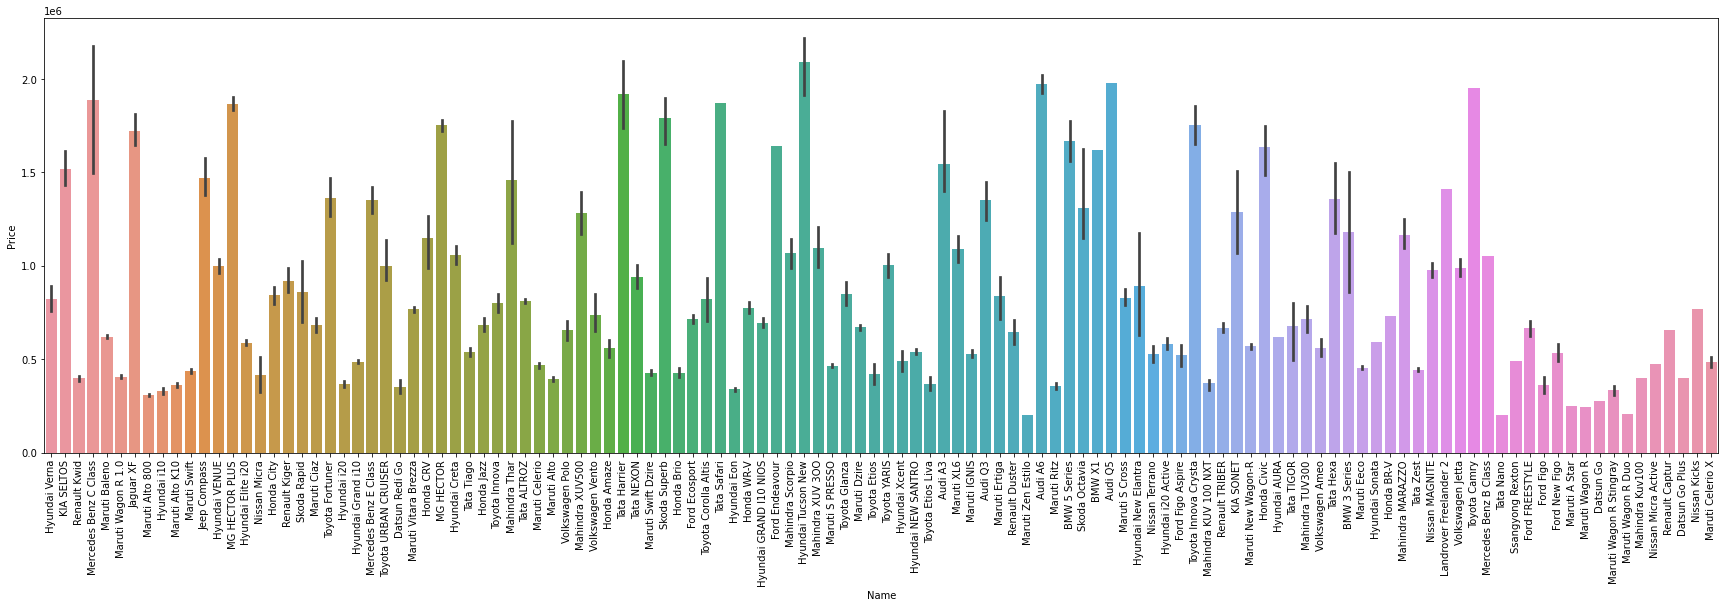

In [40]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
sns.barplot(df['Name'],df['Price'])

Mercedes Benz C Class price is the highest followed by Hyundai Tuscon New

<AxesSubplot:xlabel='Type', ylabel='Price'>

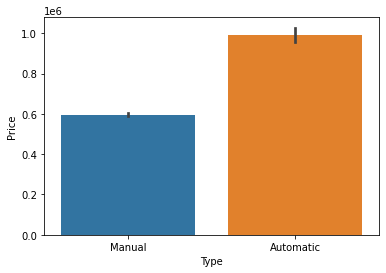

In [43]:
sns.barplot(df['Type'],df['Price'])

Automatic car price is more than the manual one

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

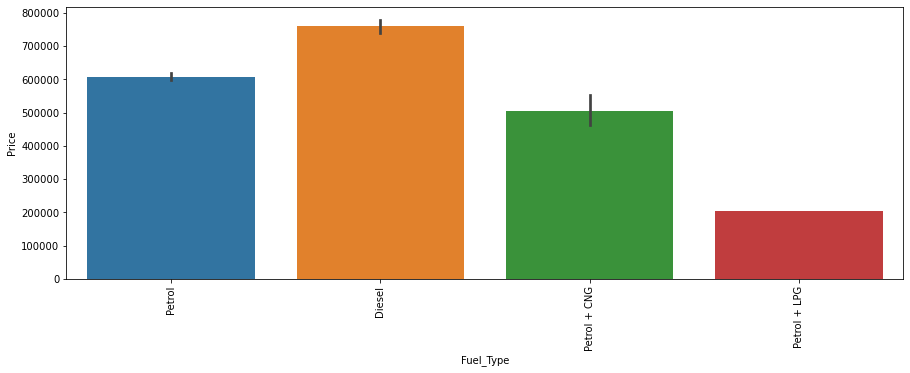

In [45]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(df['Fuel_Type'],df['Price'])

Diesel based car is costlier followed by Petrol

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

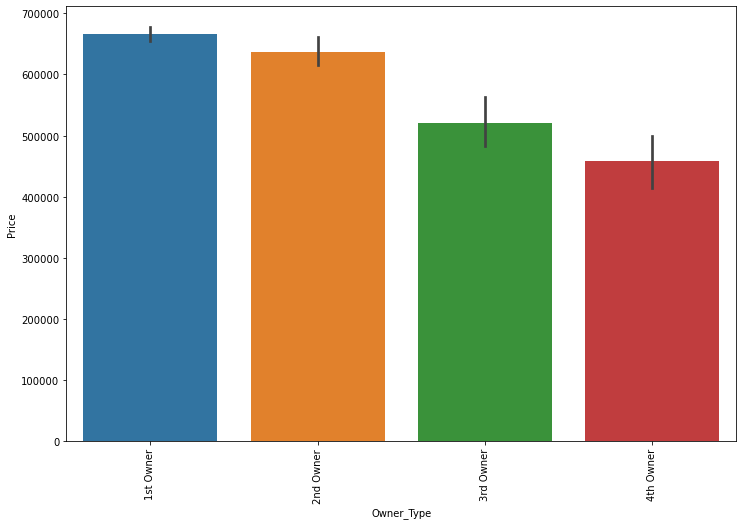

In [47]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(df['Owner_Type'],df['Price'])

1st owner based car's price is more. 2nd owner based car price is also high.

<AxesSubplot:xlabel='Year_of_Manufacturing', ylabel='Price'>

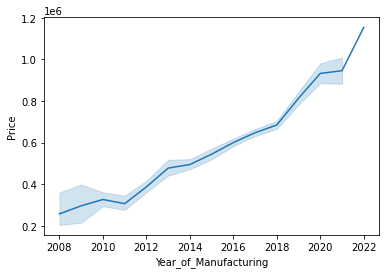

In [28]:
sns.lineplot(df['Year_of_Manufacturing'],df['Price'])

As we go for the recent manufacturing model price will be high on the other side old cars have lower rates

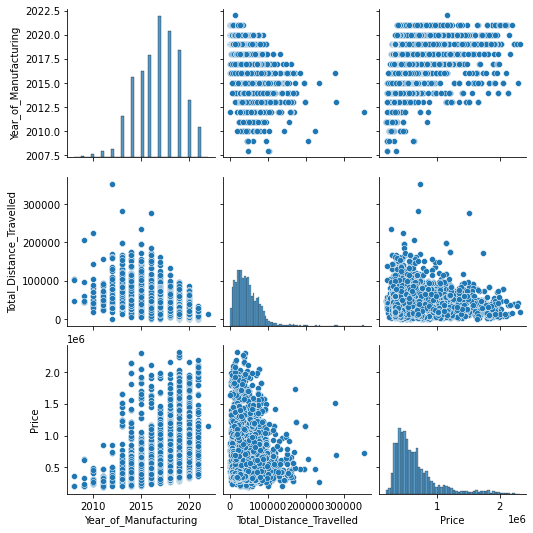

In [16]:
sns.pairplot(df)

### Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].astype(str))
df.head()

,Name,Model,Year_of_Manufacturing,Owner_Type,Total_Distance_Travelled,Type,Fuel_Type,Price
0,35,129,2019,0,80631,1,1,981699
1,42,293,2020,1,12981,1,1,1155299
2,91,348,2016,0,22388,1,1,279799
3,81,221,2014,0,36806,0,1,2133299
4,42,294,2020,1,21784,0,1,1429999


### Statistical Summary

In [55]:
df.describe()

,Name,Model,Year_of_Manufacturing,Owner_Type,Total_Distance_Travelled,Type,Fuel_Type,Price
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4.983000e+03
mean,53.699378,343.774232,2016.782260,0.224162,45354.276139,0.843668,0.675296,6.581687e+05
std,26.973364,164.271456,2.281862,0.463569,30543.047924,0.363206,0.482248,3.469485e+05
min,0.000000,0.000000,2008.000000,0.000000,71.000000,0.000000,0.000000,1.909990e+05
25%,29.000000,207.000000,2015.000000,0.000000,22775.000000,1.000000,0.000000,4.263490e+05
50%,59.000000,380.000000,2017.000000,0.000000,40336.000000,1.000000,1.000000,5.590990e+05
75%,71.000000,484.000000,2018.000000,0.000000,62285.500000,1.000000,1.000000,7.637990e+05
max,119.000000,609.000000,2022.000000,3.000000,353688.000000,1.000000,3.000000,2.314599e+06


 - We have outliers in the dataset
 - Little skewness present in the dataset

### Correlation

In [56]:
corr=df.corr()
corr

,Name,Model,Year_of_Manufacturing,Owner_Type,Total_Distance_Travelled,Type,Fuel_Type,Price
Name,1.000000,0.396621,0.007379,-0.046251,0.060823,0.016039,-0.056684,-0.080916
Model,0.396621,1.000000,-0.019361,-0.019073,-0.011084,0.056502,-0.011246,-0.150977
Year_of_Manufacturing,0.007379,-0.019361,1.000000,-0.153660,-0.515338,-0.160721,0.243455,0.405246
Owner_Type,-0.046251,-0.019073,-0.153660,1.000000,0.050248,-0.039791,0.020377,-0.057535
Total_Distance_Travelled,0.060823,-0.011084,-0.515338,0.050248,1.000000,0.090934,-0.442991,-0.119865
Type,0.016039,0.056502,-0.160721,-0.039791,0.090934,1.000000,-0.075570,-0.415276
Fuel_Type,-0.056684,-0.011246,0.243455,0.020377,-0.442991,-0.075570,1.000000,-0.209325
Price,-0.080916,-0.150977,0.405246,-0.057535,-0.119865,-0.415276,-0.209325,1.000000


<AxesSubplot:>

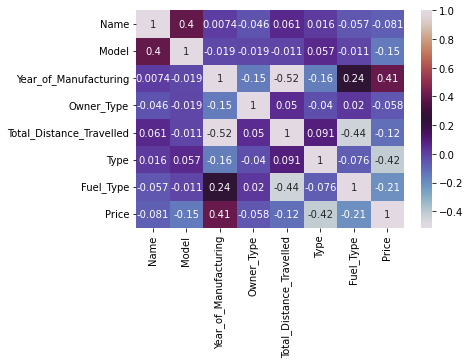

In [57]:
sns.heatmap(corr,annot=True,cmap='twilight')

In [60]:
corr['Price'].sort_values()  #sorting the values of correlation of each column with the target variable

Type                       -0.415276
Fuel_Type                  -0.209325
Model                      -0.150977
Total_Distance_Travelled   -0.119865
Name                       -0.080916
Owner_Type                 -0.057535
Year_of_Manufacturing       0.405246
Price                       1.000000
Name: Price, dtype: float64

### Checking Skewness

In [58]:
df.skew()

Name                        0.181928
Model                      -0.379018
Year_of_Manufacturing      -0.361817
Owner_Type                  1.981246
Total_Distance_Travelled    1.534313
Type                       -1.893177
Fuel_Type                  -0.560006
Price                       1.848527
dtype: float64

The skewness in the dataset is very little so we can go ahead with further process

### Plotting the outliers

Name                            AxesSubplot(0.125,0.71587;0.352273x0.16413)
Model                        AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Year_of_Manufacturing          AxesSubplot(0.125,0.518913;0.352273x0.16413)
Owner_Type                  AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Total_Distance_Travelled       AxesSubplot(0.125,0.321957;0.352273x0.16413)
Type                        AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Fuel_Type                         AxesSubplot(0.125,0.125;0.352273x0.16413)
Price                          AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

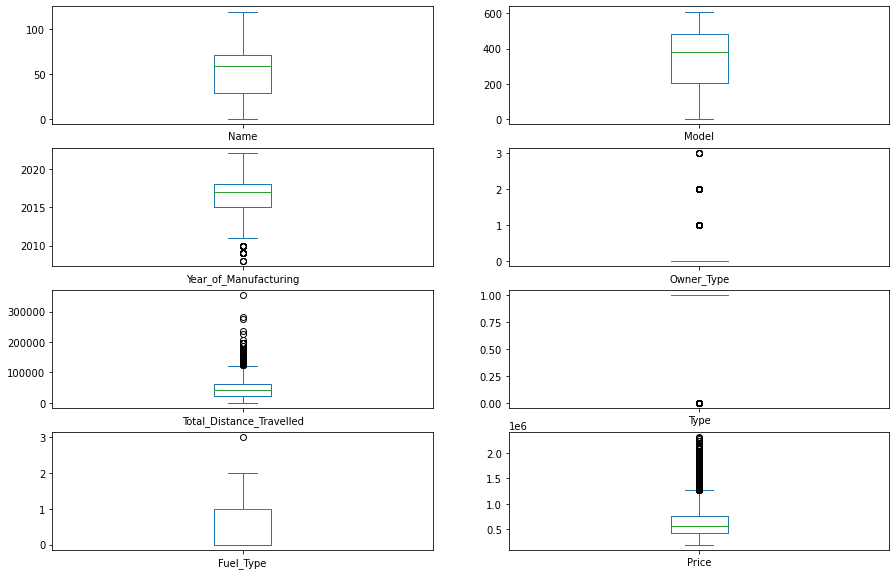

In [61]:
df.plot(kind='box',subplots=True,layout=(4,2),figsize=(15,10))

We have outliers so they have to be removed

In [8]:
#sepearting the dependent and independent varaibles
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#### Removing outliers

In [9]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([   3,    9,   12,   14,   23,   29,   32,   34,   65,   67,   74,
         76,   80,   98,  108,  122,  124,  137,  142,  150,  167,  173,
        188,  193,  294,  304,  332,  338,  357,  368,  368,  372,  375,
        376,  397,  413,  417,  424,  437,  452,  514,  538,  552,  555,
        635,  675,  684,  701,  704,  712,  713,  723,  729,  735,  767,
        775,  777,  796,  798,  806,  809,  815,  839,  850,  855,  859,
        901,  964,  974,  989, 1035, 1079, 1081, 1087, 1094, 1098, 1121,
       1122, 1128, 1128, 1136, 1137, 1154, 1199, 1211, 1230, 1297, 1326,
       1363, 1365, 1384, 1388, 1389, 1390, 1398, 1407, 1410, 1417, 1435,
       1442, 1465, 1485, 1493, 1499, 1501, 1515, 1517, 1530, 1553, 1581,
       1638, 1654, 1678, 1679, 1694, 1696, 1699, 1699, 1705, 1708, 1710,
       1736, 1743, 1767, 1778, 1844, 1859, 1863, 1866, 1878, 1970, 2044,
       2046, 2082, 2100, 2107, 2146, 2155, 2182, 2184, 2236, 2247, 2249,
       2255, 2257, 2262, 2285, 2288, 2298, 2311, 2

(4670, 8)

### Model Building

In [13]:
#importing the different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [14]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

#### Finding the best random state

In [15]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.4459634857166468 on random state 45


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)

#### Linear Regression

In [17]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.4459634857166468


#### Decision Tree Regressor

In [18]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.8856552523096618


#### Support Vector Regressor

In [19]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  -0.08005490482792754


#### K Neighbor Regressor

In [20]:
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.04292499937121386


#### Random Forest Regressor

In [21]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.942351061631132


### Cross Val Score

In [22]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(rdr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  85.942859785015
at cv=  4
cross val score =  90.8769072158919
at cv=  5
cross val score =  91.41279286544679
at cv=  6
cross val score =  91.7821441798227


### Hypermeter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'criterion':['squared_error','absolute_error','poisson'],
     'max_features':['sqrt','log2'],
     'max_depth':[1,2,3,4,5]}

GCV=GridSearchCV(rdr,para,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt'}

In [24]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.184987654844048

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  186211.6989881081
mean squared error:  69371608166.73717
root mean squared error:  263384.90497129323


error:
mean absolute error:  48364.278836509526
mean squared error:  14317249546.194584
root mean squared error:  119654.70966992727


error:
mean absolute error:  242305.1181184858
mean squared error:  135235031852.00952
root mean squared error:  367743.16017026


error:
mean absolute error:  242901.88104312937
mean squared error:  119836563508.23802
root mean squared error:  346174.18088043196


error:
mean absolute error:  43507.40065195587
mean squared error:  7218296015.970094
root mean squared error:  84960.55564772451




As we have seen that the accuracy score for random forest regressor with the best hyper parameters is very low so let's go with the decision tree regressor model which is also having a good predicton score

### Cross val Score

In [26]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(dtr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  76.33747044735803
at cv=  4
cross val score =  85.46379663489655
at cv=  5
cross val score =  87.27113441425047
at cv=  6
cross val score =  87.28937269229745


### Hypermeter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'criterion':['squared_error','absolute_error','poisson','friedman_mse'],
     'max_features':['sqrt','log2','auto'],
     'max_depth':[1,2,3,4,5],
     'splitter':['best','random']}

GCV=GridSearchCV(dtr,para,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'random'}

In [29]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.4663703959145542

With decision tree regressor we are getting a bettor accuracy score so we will save the decision tree model

### Saving the Model

In [32]:
import pickle
filename='used_car_price.pkl'
pickle.dump(dtr, open(filename,'wb'))

### Conclusion

In [31]:
a=np.array(y_test)
pred=np.array(pred2)
Used_Car_Price=pd.DataFrame({'Actual':a,'Predicted':pred})
Used_Car_Price

,Actual,Predicted
0,579299,600499.0
1,312099,333699.0
2,1660599,1583499.0
3,607499,476349.0
4,557399,565499.0
5,770199,720999.0
6,421399,428999.0
7,1097099,1097099.0
8,340499,340499.0
9,490199,490199.0
